In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
import urllib
from scipy import stats

In [2]:
webuser = pd.read_csv("../IOD/WebuserData.csv")

In [3]:
webuser.head()

,City,Month,Age,female,male,Users
0,Auckland,October,18-24,10828,10284,21112
1,Auckland,October,25-34,25069,25170,50239
2,Auckland,October,35-44,21890,21158,43048
3,Auckland,October,45-54,27314,26771,54085
4,Auckland,October,55-64,28988,26419,55407


In [4]:
webuser.tail()

,City,Month,Age,female,male,Users
94,Wellington,December,25-34,7077,8287,15364
95,Wellington,December,35-44,6458,6715,13173
96,Wellington,December,45-54,8207,8384,16591
97,Wellington,December,55-64,9201,8515,17716
98,Wellington,December,65+,8921,6800,15721


In [5]:
webuser.shape

(99, 6)

In [6]:
webuser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    99 non-null     object
 1   Month   99 non-null     object
 2   Age     99 non-null     object
 3   female  99 non-null     int64 
 4   male    99 non-null     int64 
 5   Users   99 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


In [7]:
webuser.isnull().sum()

City      0
Month     0
Age       0
female    0
male      0
Users     0
dtype: int64

In [8]:
webuser.Age

0     18-24
1     25-34
2     35-44
3     45-54
4     55-64
      ...  
94    25-34
95    35-44
96    45-54
97    55-64
98      65+
Name: Age, Length: 99, dtype: object

In [9]:
webuser.describe(include='all')

,City,Month,Age,female,male,Users
count,99,99,99,99.000000,99.000000,99.000000
unique,8,3,6,NaN,NaN,NaN
top,Auckland,October,55-64,NaN,NaN,NaN
freq,18,34,22,NaN,NaN,NaN
mean,NaN,NaN,NaN,8389.414141,7762.797980,16152.212121
std,NaN,NaN,NaN,8466.657628,8193.381398,16605.876460
min,NaN,NaN,NaN,83.000000,0.000000,84.000000
25%,NaN,NaN,NaN,1561.000000,1013.000000,2507.500000
50%,NaN,NaN,NaN,4711.000000,4713.000000,9424.000000
75%,NaN,NaN,NaN,12022.500000,11702.500000,23546.500000


NameError: name 'ymin' is not defined

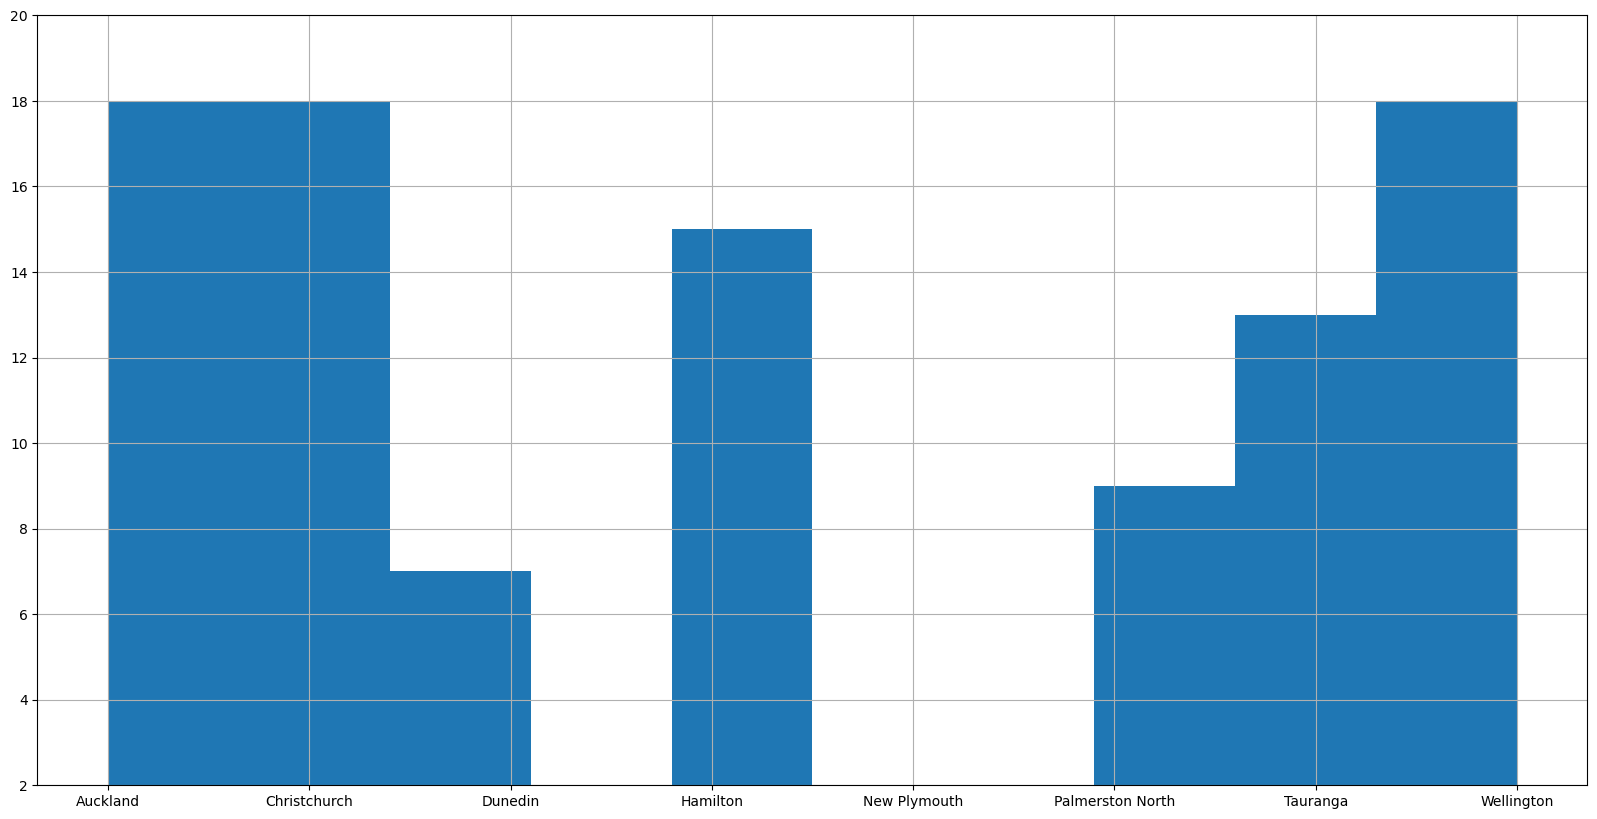

In [66]:
webuser['City'].hist(figsize=(20, 10));
ax = plt.gca()
plt.ylim(ymax = 20, ymin = 2)
ax.set_ylim([ymin, ymax])

In [15]:
webuser['Month'].value_counts()

October     34
November    33
December    32
Name: Month, dtype: int64

C:\Users\Shivraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


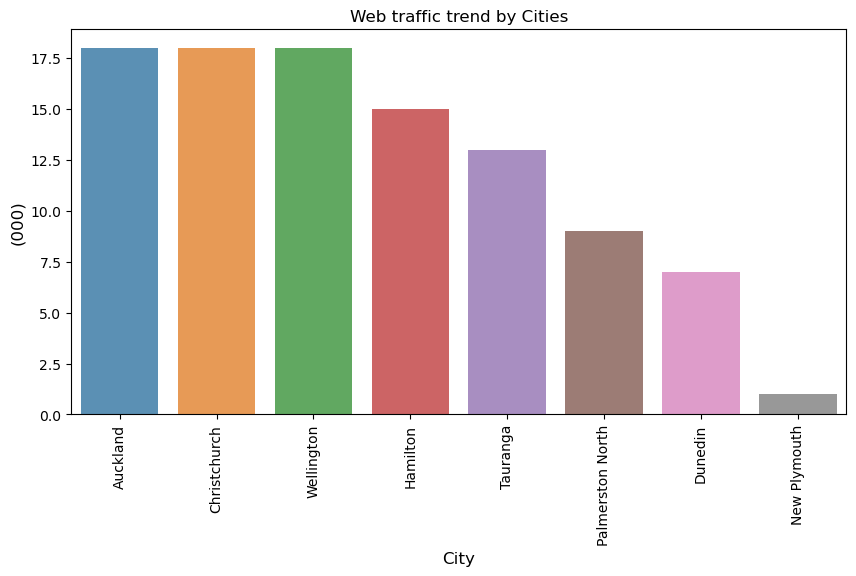

In [64]:
city_count  = webuser['City'].value_counts()
city_count = city_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Web traffic trend by Cities')
plt.xticks(rotation='vertical')
plt.ylabel('(000)', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.show()

C:\Users\Shivraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'ymin' is not defined

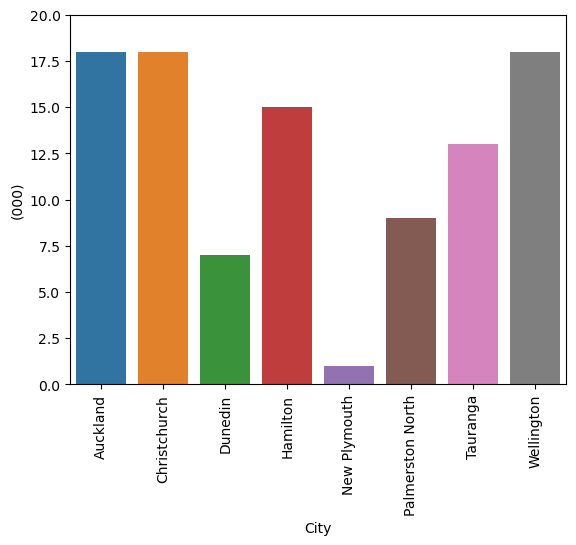

In [49]:
sns.countplot(webuser['City'])
webuser['City'].value_counts()
plt.xticks(rotation='vertical')
plt.ylabel('(000)')
plt.ylim(ymax = 20, ymin = 0)
ax.set_ylim([ymin, ymax])
plt.title('Web traffic trend by Cities')
plt.show();

C:\Users\Shivraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

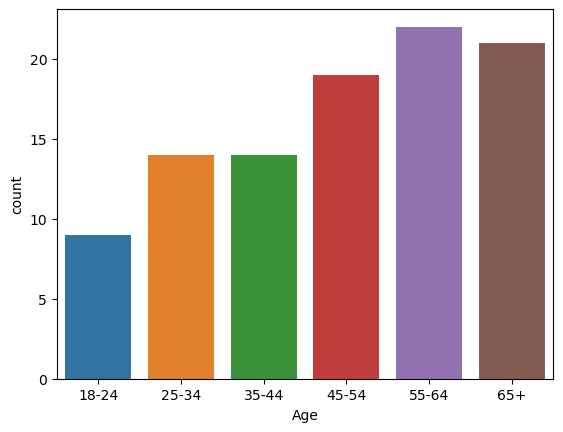

In [18]:
## What is the User pattern by Age
sns.countplot(webuser['Age'])

C:\Users\Shivraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Percentage')

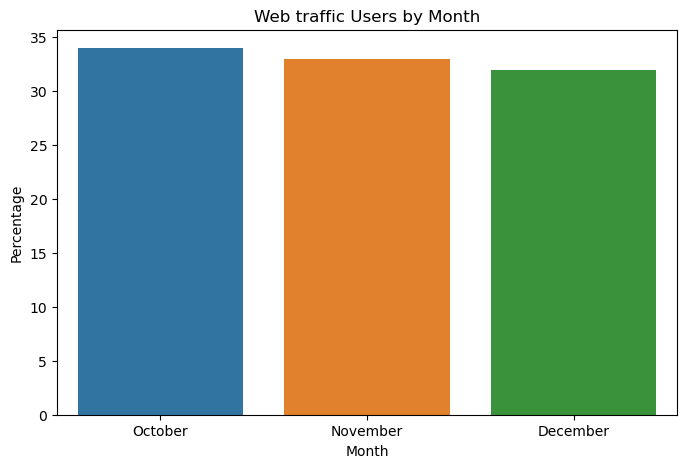

In [51]:
## Which month has maximum online traffic?
plt.figure(figsize=(8, 5))
plt.title('Web traffic Users by Month')
sns.countplot(webuser['Month'])
plt.ylabel('Percentage')

In [ ]:
# Which city should be chosen for expansion?

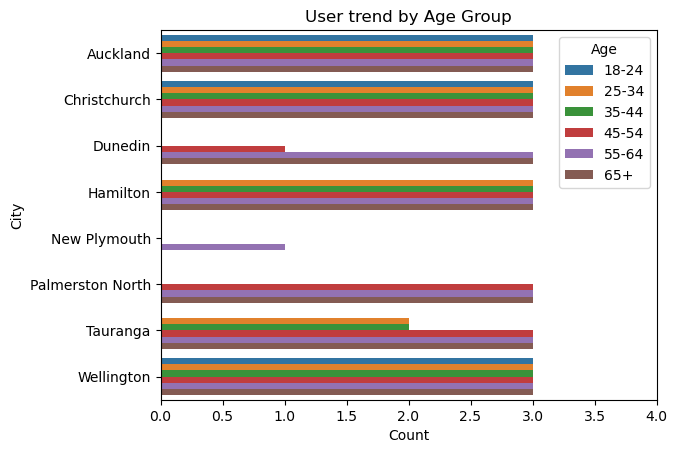

In [25]:
plt.figure(dpi=100)
sns.countplot(y ='City', hue = "Age", data = webuser) 
plt.xlim(xmax = 4.0, xmin = 0.0)
plt.xlabel('Count')
plt.title('User trend by Age Group')
plt.show()

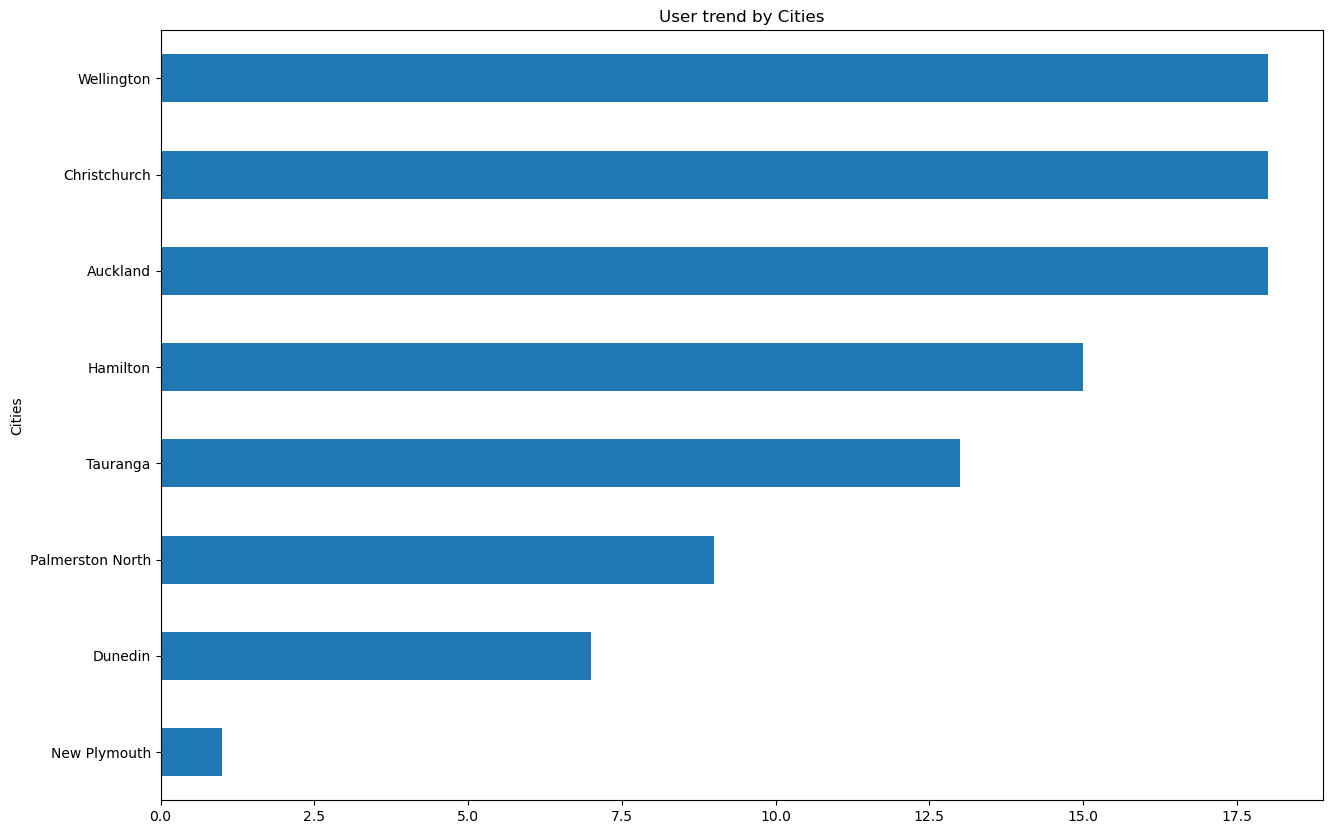

In [26]:
webuser['City'].value_counts().sort_values().plot(kind='barh', figsize=(15,10));
plt.xlabel('')
plt.title('User trend by Cities')
plt.ylabel('Cities')
plt.show();

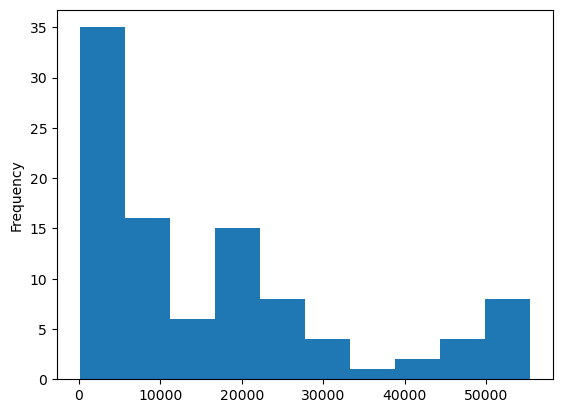

In [27]:
##### Hypothesis Test
Users = webuser['Users']
Users.plot(kind='hist');

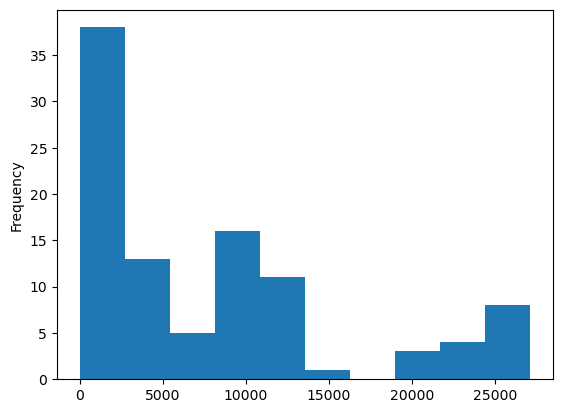

In [28]:
Male = webuser['male']
Male.plot(kind='hist');

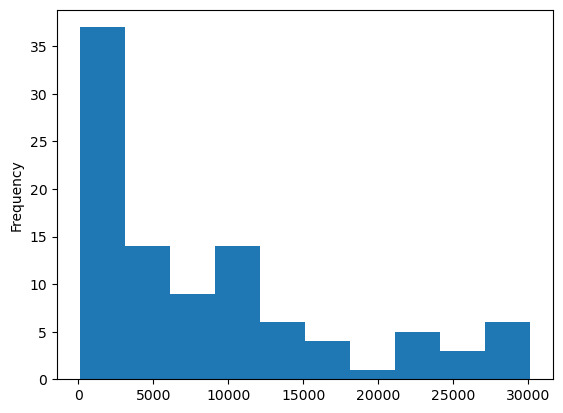

In [29]:
Female = webuser['female']
Female.plot(kind='hist');

In [30]:
alpha = 1000

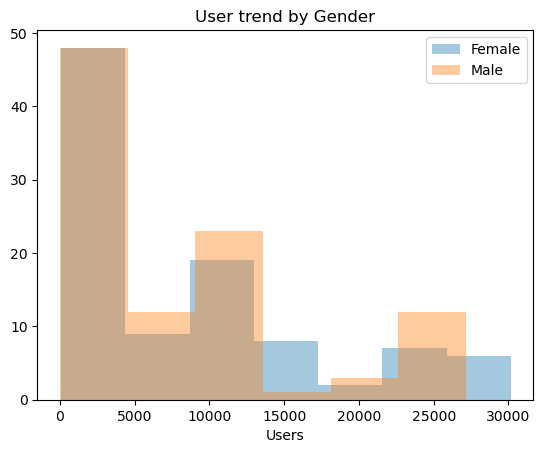

In [39]:
ax = sns.distplot(Female, label='Female', kde=False);
sns.distplot(Male, ax=ax, label='Male', kde=False);
plt.legend(loc = 'upper right')
plt.xlabel('Users')
plt.title('User trend by Gender')
plt.ylabel('')
plt.show();

In [40]:
std = np.sqrt((Female + Male) / 2)
print('std dev:', std)

std dev: 0     102.742396
1     158.491325
2     146.710599
3     164.446040
4     166.443684
         ...    
94     87.647019
95     81.157255
96     91.079635
97     94.116949
98     88.659461
Length: 99, dtype: float64


In [ ]:
t = (Female.mean() - Male.mean()) / (std * np.sqrt(2 / N))  # t-statistic
print('t:', t)

In [ ]:
df = 2 * N - 2
df

In [ ]:
p = 1 - stats.t.cdf(abs(t), df=df)

In [ ]:
print("t = " + str(t))
print("p = " + str(2 * p))